Otavio Santos 81883

**1.Calcule a transformada rapida de Fourier dos dados contidos no arquivo 'series.mat' (enviado por email), plote o seu periodograma, e identifique os picos de frequencia na referida figura. Os dados correspondem a uma serie sintética de tamanho N e um vetor de tempo que se inicia em t = 0 até t = N −1. Plote as figuras que julgue necessarias para a compreensão da análise (e.g. série temporal, etc.).**



In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
# Importando os dados
data = loadmat('series.mat')

In [3]:
# Identificando cada tipo de chave no arquivo data
for key in data.keys():
    print(key, "\t", type(data[key]) )

__header__ 	 <class 'bytes'>
__version__ 	 <class 'str'>
__globals__ 	 <class 'list'>
t 	 <class 'numpy.ndarray'>
y 	 <class 'numpy.ndarray'>


In [4]:
# Dataframe dos dados
df = pd.DataFrame(columns = ['t', 'y'])
df['t'] = data['t'].T.squeeze()
df['y'] = data['y'].T.squeeze()
df.head()

,t,y
0,0,12.155574
1,1,16.045008
2,2,4.971446
3,3,4.967830
4,4,8.952543


In [5]:
# Eixo x (tempo) e y (dados)
x = df['t'] 
y = df['y']

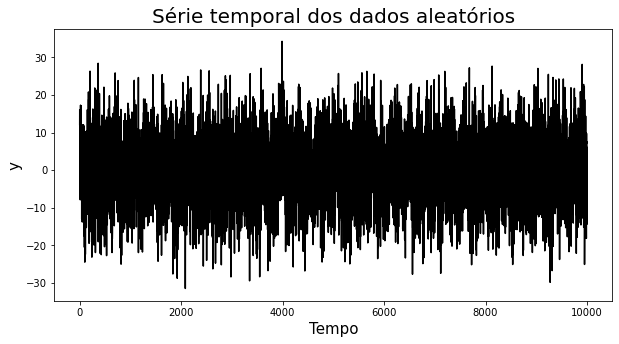

In [6]:
# Plot da série temporal de dados aleatórios
plt.figure(figsize=(10,5))
plt.plot(x, y, color = 'black')
plt.title('Série temporal dos dados aleatórios', fontdict={'size':20})
plt.xlabel('Tempo', fontdict={'size':15})
plt.ylabel('y', fontdict={'size':15})
plt.show()

In [7]:
# Tamanho da amostra
N = len(df['y'])
N

10000

In [8]:
# Encontrar potência de 2 ideal para a fft
n = int(2**np.ceil(np.log2(N)))
n

16384

In [9]:
# Remover a média dos dados
y = y[:] - df['y'].mean()

In [10]:
# fft
fft = np.fft.fft(y, n)

In [11]:
# Potência
pt = (fft.conjugate() * fft) / n
pt = pt.real

In [12]:
# Frequências
m = n // 2
delta_t = (N-1) / N
fc = 1 / (2 * delta_t) #  frequência crítica
f = fc * np.arange(0, m+1) # vetor frequência de potência
pt = pt[:m+1]
pt[1:] = 2 * pt[1:]

In [13]:
# Picos de frequência e seus índices
sort = pt.copy()
sort[::-1].sort()
sort = pd.Series(sort)
i = np.zeros(3)

for c in range(0, 3):
    i[c] = np.where(pt==sort[c])[0]
i = np.intp(i)

In [14]:
# Maiores potências e respectivas frequências
print(sort[:3])
print(pd.Series(f[i]))

0    23271.647419
1    19193.853097
2    15466.307286
dtype: float64
0     45.504550
1    273.027303
2     22.502250
dtype: float64


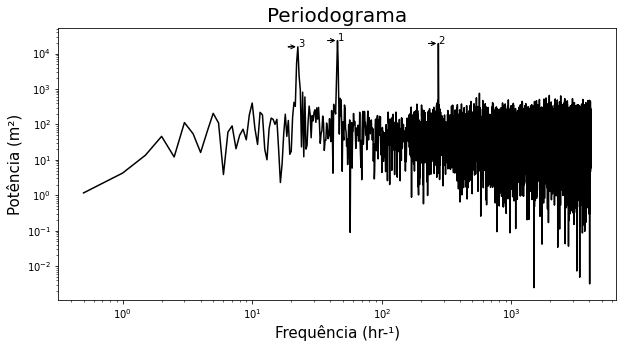

In [16]:
# Periodograma
strg = ['1','2','3']
plt.figure(figsize=(10,5))
plt.loglog(f[1:], pt[1:], color='black')
for c in range(0,3):
    plt.annotate(strg[c],xy=[f[i[c]],pt[i[c]]],arrowprops=dict(arrowstyle = "->",connectionstyle = "angle,angleA=45,angleB=0,rad=10"))
plt.title('Periodograma', fontdict={'size':20})
plt.xlabel('Frequência (hr-¹)', fontdict={'size':15})
plt.ylabel('Potência (m²)', fontdict={'size':15})
plt.show()

**2. Vamos agora utilizar o arquivo 'woods_hole_tides_2005_05.dat' para realizar uma análise espectral de um dado real, conforme visto em sala de aula.**

- **Calcule a FFT dos dados e plote o seu periodograma. Lembro sempre devemos informar o que representa cada um dos eixos de uma figura, assim como a unidade dos mesmos.**

- **Encontre os 8 picos mais energeticos e represente-os no seu periodograma. Discuta se estes picos sao real realíticos do ponto de vista dos dados de entrada utilizados, ou seja, eles fazem sentido?**

- **Por fim, prove que o teorema de Parseval é válido.**

In [17]:
# Importando os dados
data = np.loadtxt('woods_hole_tides_2005_05.dat')

In [18]:
# Dimensão dos dados
data.shape

(7440, 8)

In [19]:
# Organizando os dados em um dataframe
col = ['station ID', 'year', 'month', 'day', 'hour', 'minute', 'predMLLW', 'verMLLW']
df = pd.DataFrame(data, columns = col)
df.head()

,station ID,year,month,day,hour,minute,predMLLW,verMLLW
0,8447930.0,2005.0,5.0,1.0,0.0,0.0,0.316,0.572
1,8447930.0,2005.0,5.0,1.0,0.0,6.0,0.334,0.558
2,8447930.0,2005.0,5.0,1.0,0.0,12.0,0.353,0.570
3,8447930.0,2005.0,5.0,1.0,0.0,18.0,0.372,0.580
4,8447930.0,2005.0,5.0,1.0,0.0,24.0,0.391,0.622


In [20]:
# Ajustando a data
date = pd.DataFrame(df[col[1:6]])
date = pd.to_datetime(date, format='%Y-%m-%D %H:%M')
df['Date'] = date
del (df['year'], df['month'], df['day'], df['hour'], df['minute'])
df.head()

,station ID,predMLLW,verMLLW,Date
0,8447930.0,0.316,0.572,2005-05-01 00:00:00
1,8447930.0,0.334,0.558,2005-05-01 00:06:00
2,8447930.0,0.353,0.570,2005-05-01 00:12:00
3,8447930.0,0.372,0.580,2005-05-01 00:18:00
4,8447930.0,0.391,0.622,2005-05-01 00:24:00


In [21]:
# Tamanho da amostra
N = len(df['verMLLW'])
N

7440

In [22]:
# Potência de 2 ideal
n = int(2**np.ceil(np.log2(N)))
n

8192

In [23]:
# Remover a média dos dados
y = df['verMLLW'][:] - df['verMLLW'].mean()

In [24]:
# fft
fft = np.fft.fft(y, n)

In [25]:
# Potência
pt = (fft.conjugate() * fft)/n
pt = pt.real

In [26]:
# Frequências
m = n // 2
delta_t = (N-1) / N
fc = 1 / (2 * delta_t) #  frequência crítica
f = fc * np.arange(0, m+1) # vetor frequência de potência 
pt = pt[:m+1]
pt[1:] = 2 * pt[1:]

In [29]:
# Oito picos de frequência mais energéticos
sort = pt.copy()
sort[::-1].sort()
sort = pd.Series(sort)
i = np.zeros(8)

for c in range(0, 8):
    i[c] = np.where(pt==sort[c])[0]
i = np.intp(i)

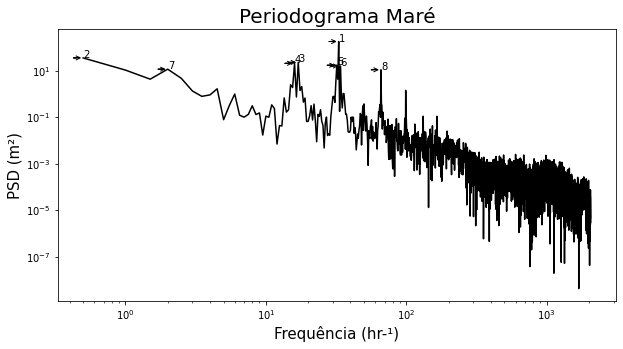

In [30]:
# Periodiograma
strg = ['1','2','3', '4', '5', '6', '7', '8']
plt.figure(figsize=(10,5))
plt.loglog(f[1:], pt[1:], color='black')
for c in range(0,8):
    plt.annotate(strg[c],xy=[f[i[c]],pt[i[c]]],arrowprops=dict(arrowstyle = "->",connectionstyle = "angle,angleA=45,angleB=0,rad=10"))
plt.title('Periodograma Maré', fontdict={'size':20})
plt.xlabel('Frequência (hr-¹)', fontdict={'size':15})
plt.ylabel('PSD (m²)', fontdict={'size':15})
plt.show()

In [31]:
# Periodo dos picos
p = pd.Series(1/f[i])
print(p)

0    0.030299
1    1.999731
2    0.058816
3    0.062492
4    0.031246
5    0.029408
6    0.499933
7    0.015149
dtype: float64


In [32]:
# Retorna a mensagem se o teorema de Parseval for válido
if(np.round(sum(abs(y)**2),4)==np.round(sum(pt),5)):
    print('O teorema de Parseval é valido.')

O teorema de Parseval é valido.
